<a href="https://colab.research.google.com/github/ddaddaradda/DL/blob/main/k_means_cluster_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_vector = np.load('/content/drive/MyDrive/tmp/별떠라가자_공유폴더/AI파트/데이터/벡터/train_vector.npy',allow_pickle=True)
train_timestamps = np.load('/content/drive/MyDrive/tmp/별떠라가자_공유폴더/AI파트/데이터/벡터/train_timestamps.npy',allow_pickle=True)
test_vector = np.load('/content/drive/MyDrive/tmp/별떠라가자_공유폴더/AI파트/데이터/벡터/test_vector.npy',allow_pickle=True)
test_timestamps = np.load('/content/drive/MyDrive/tmp/별떠라가자_공유폴더/AI파트/데이터/벡터/test_timestamps.npy',allow_pickle=True)

In [4]:
df = pd.DataFrame(train_vector)

In [5]:
df.shape

(219303, 16)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.279847,0.845181,0.190835,0.114829,0.347982,0.237325,0.723360,0.526546,0.013563,0.656550,0.969472,0.920815,0.977463,0.134568,0.218769,0.958120
1,0.437147,0.826159,0.352468,0.183996,0.569637,0.141854,0.758915,0.534310,0.027501,0.416795,0.956472,0.847507,0.960847,0.128099,0.257295,0.946407
2,0.052259,0.979452,0.023697,0.988380,0.030349,0.956554,0.909832,0.035456,0.006930,0.945842,0.284556,0.975026,0.854473,0.861021,0.340714,0.885435
3,0.079816,0.282870,0.156296,0.006321,0.531231,0.021131,0.198735,0.191594,0.018926,0.912728,0.978815,0.911623,0.994724,0.022438,0.023776,0.918168
4,0.172524,0.793916,0.151806,0.037110,0.415080,0.109669,0.608262,0.414503,0.009304,0.755783,0.978282,0.928883,0.986641,0.062979,0.102212,0.965993


# k-means

## K = 5

In [7]:
k5_df = df 

In [8]:
from sklearn.cluster import KMeans

k= 5    

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 데이터 학습
model.fit(k5_df)


# 클러스터링 결과 각 데이터가 어디 그룹에 속하는지 저장
predicted = model.predict(k5_df)

In [9]:
k5_df['cluster'] = 0 #컬럼 생성 + integer 선언 
k5_df['cluster'] = predicted

In [10]:
k5_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,cluster
0,0.279847,0.845181,0.190835,0.114829,0.347982,0.237325,0.723360,0.526546,0.013563,0.656550,0.969472,0.920815,0.977463,0.134568,0.218769,0.958120,1
1,0.437147,0.826159,0.352468,0.183996,0.569637,0.141854,0.758915,0.534310,0.027501,0.416795,0.956472,0.847507,0.960847,0.128099,0.257295,0.946407,2
2,0.052259,0.979452,0.023697,0.988380,0.030349,0.956554,0.909832,0.035456,0.006930,0.945842,0.284556,0.975026,0.854473,0.861021,0.340714,0.885435,4
3,0.079816,0.282870,0.156296,0.006321,0.531231,0.021131,0.198735,0.191594,0.018926,0.912728,0.978815,0.911623,0.994724,0.022438,0.023776,0.918168,1
4,0.172524,0.793916,0.151806,0.037110,0.415080,0.109669,0.608262,0.414503,0.009304,0.755783,0.978282,0.928883,0.986641,0.062979,0.102212,0.965993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219298,0.317849,0.952561,0.107728,0.988890,0.108539,0.994341,0.939885,0.922956,0.025875,0.706795,0.120904,0.939806,0.025892,0.973805,0.915036,0.862439,0
219299,0.468423,0.901120,0.316958,0.550830,0.495980,0.579875,0.824058,0.811924,0.030454,0.324627,0.833959,0.830296,0.711032,0.474191,0.573940,0.956591,2
219300,0.351650,0.887063,0.186231,0.551468,0.417342,0.754555,0.826287,0.763170,0.018118,0.448393,0.881104,0.925015,0.804225,0.513298,0.454146,0.938706,2
219301,0.342861,0.931252,0.168791,0.851116,0.342518,0.891098,0.918792,0.894006,0.011491,0.394794,0.852211,0.928835,0.585338,0.709067,0.700686,0.967982,0


In [11]:
k5_df['cluster'].value_counts()

2    70608
1    59307
3    35116
0    32781
4    21491
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


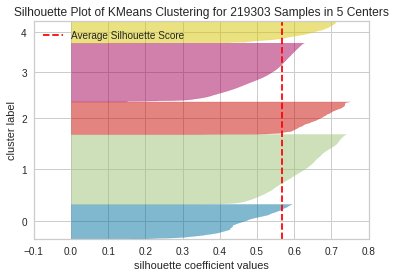

In [18]:
model = KMeans(5, random_state=42)
model.fit(k5_df)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(k5_df)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


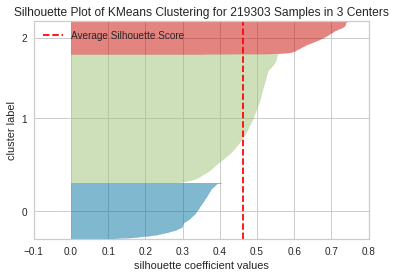

In [19]:
model = KMeans(3, random_state=42)
model.fit(df)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


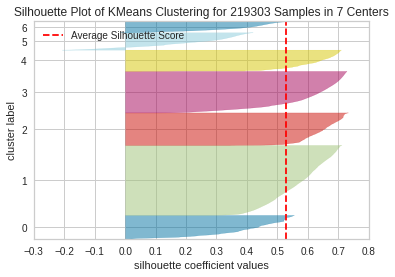

In [20]:
model = KMeans(7, random_state=42)
model.fit(df)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


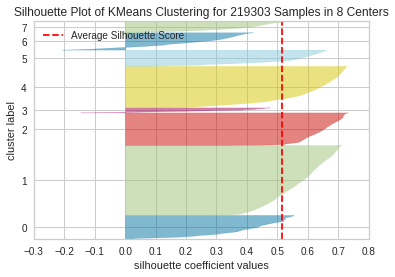

In [21]:
model = KMeans(8, random_state=42)
model.fit(df)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

# 비교

트레인 데이터로 학습시킨 모델로 테스트데이터를 cluster 했을때와
테스트 데이터로 cluster했을 때를 비교

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

In [84]:
test_df = pd.DataFrame(test_vector)

In [70]:
test_df.shape

(24366, 16)

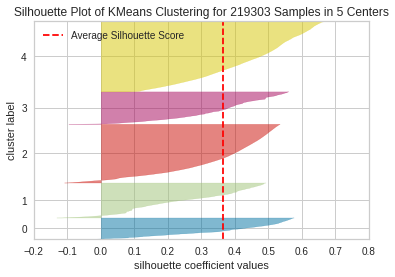

In [92]:
model = KMeans(5, random_state=42)
model.fit(train_vectors)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(train_vectors)        # Fit the data to the visualizer
visualizer.show()

### 1. 트레인 데이터로 학습시킨 모델로 테스트데이터를 cluster k=3

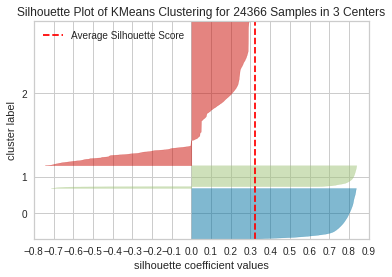

In [97]:
model = KMeans(3, random_state=42)
model.fit(train_vectors)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show()

### 2. 테스트데이터를 cluster k=3

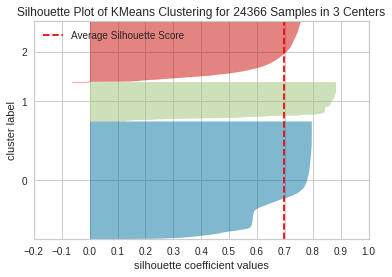

In [98]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show() 

### 1. 트레인 데이터로 학습시킨 모델로 테스트데이터를 cluster k=5

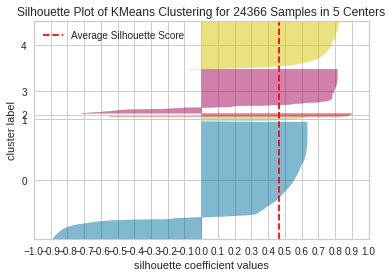

In [99]:
model = KMeans(5, random_state=42)
model.fit(train_vectors)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show()

### 2. 테스트데이터를 cluster k=5

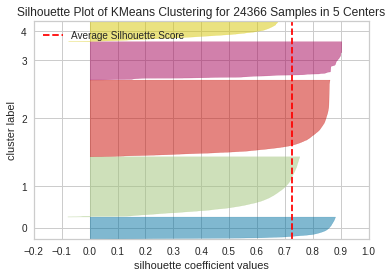

In [100]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show() 

### 1. 트레인 데이터로 학습시킨 모델로 테스트데이터를 cluster k=7

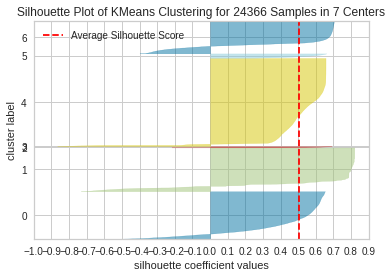

In [101]:
model = KMeans(7, random_state=42)
model.fit(train_vectors)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show()

### 2. 테스트데이터를 cluster k=7

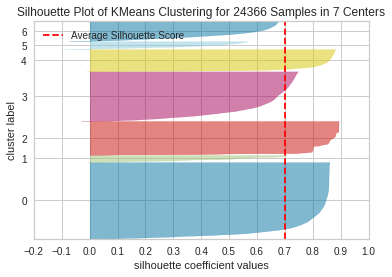

In [102]:
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show() 

### 1. 트레인 데이터로 학습시킨 모델로 테스트데이터를 cluster k=8

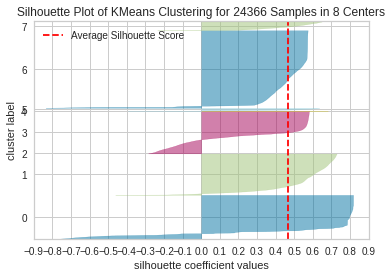

In [103]:
model = KMeans(8, random_state=42)
model.fit(train_vectors)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show()

### 2. 테스트데이터를 cluster k=8

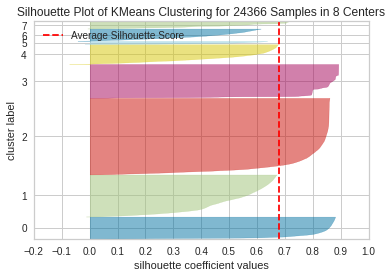

In [104]:
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(test_df)        # Fit the data to the visualizer
visualizer.show() 

# KElbowVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

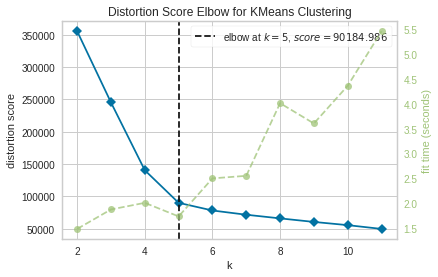

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df) 
visualizer.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

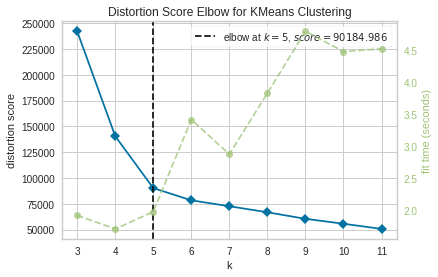

In [17]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))
visualizer.fit(df)
visualizer.show() 

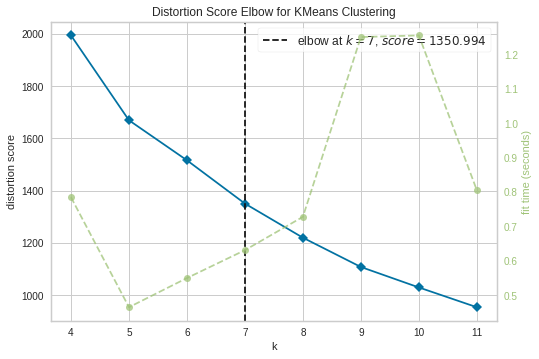

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(df) 
visualizer.show() 

/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


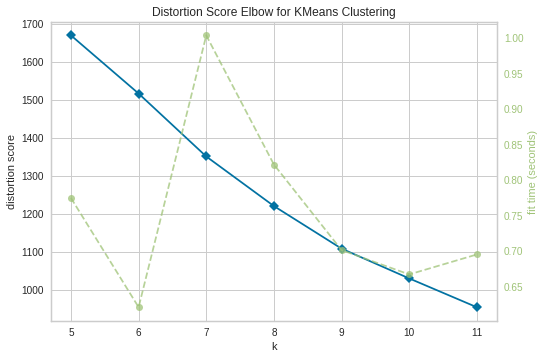

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,12))
visualizer.fit(df1) 
visualizer.show() 

#Intercluster Distance Maps

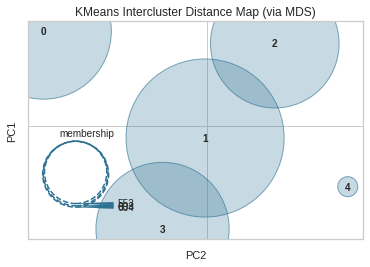

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(5)
visualizer = InterclusterDistance(model)
visualizer.fit(df1)       
visualizer.show()

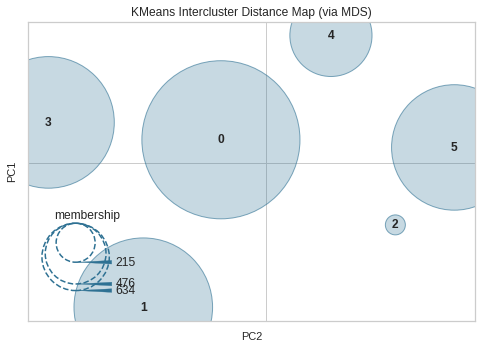

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(6)
visualizer = InterclusterDistance(model)
visualizer.fit(df1)       
visualizer.show()

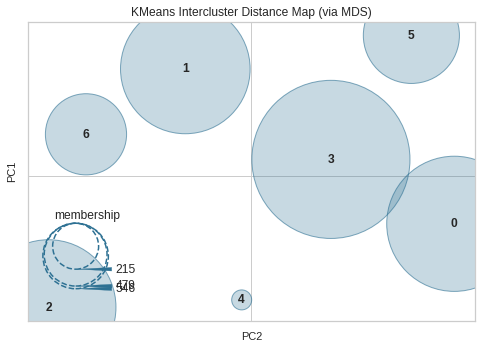

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(7)
visualizer = InterclusterDistance(model)
visualizer.fit(df1)       
visualizer.show()

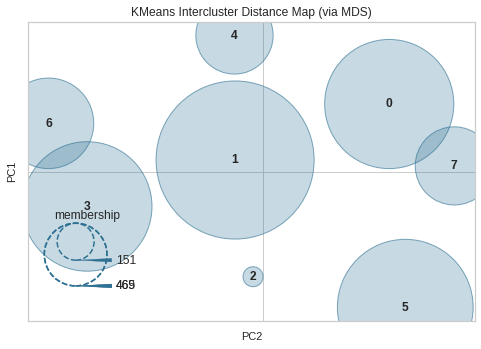

In [ ]:
from yellowbrick.cluster import InterclusterDistance
model = KMeans(8)
visualizer = InterclusterDistance(model)
visualizer.fit(df1)       
visualizer.show()